In [62]:
import pandas as pd
import numpy as np
#from datetime import datetime, timedelta, date, time
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline
# get directory address


# Introudction 
Customer_Churn.csv is a dataset that contains information about customers of a telecommunications company and whether or not they have churned (i.e., stopped using the company's services). Each row in the dataset represents a single customer, and the columns provide information about the customer's account, services, and demographic characteristics. The dataset contains the following columns:

> customerID: A unique identifier for each customer

> gender: The gender of the customer (male or female)

> SeniorCitizen: Whether the customer is a senior citizen (1) or not (0)

> Partner: Whether the customer has a partner (Yes or No)

> Dependents: Whether the customer has dependents (Yes or No)

> tenure: The length of time (in months) that the customer has been with the company

> PhoneService: Whether the customer has a phone service (Yes or No)

> MultipleLines: Whether the customer has multiple phone lines (Yes, No, or No phone service)

> InternetService: The type of internet service the customer has (DSL, Fiber optic, or No)

> OnlineSecurity: Whether the customer has online security (Yes, No, or No internet service)

> OnlineBackup: Whether the customer has online backup (Yes, No, or No internet service)

> DeviceProtection: Whether the customer has device protection (Yes, No, or No internet service)

> TechSupport: Whether the customer has tech support (Yes, No, or No internet service)

> StreamingTV: Whether the customer has streaming TV (Yes, No, or No internet service)

> StreamingMovies: Whether the customer has streaming movies (Yes, No, or No internet service)

> Contract: The type of contract the customer has (Month-to-month, One year, or Two year)

> PaperlessBilling: Whether the customer has paperless billing (Yes or No)

> PaymentMethod: The payment method the customer uses (Electronic check, Mailed check, Bank transfer (automatic), or Credit card 
(automatic))

> MonthlyCharges: The amount the customer is charged each month

> TotalCharges: The total amount the customer has been charged

> Churn: Whether the customer has churned (Yes or No)

The goal of the dataset is to predict whether or not a customer will churn based on the other information provided in the dataset.

> In this notebook we use the Telco Customer Churn data to create a prediction model if the customer will stay or leave the company.

> The Target Variable churn is imblances. with 36% as the minority class.

> We will use multiple different ml models after cleaning precprcing data and choose the best model

> then we will use the upsampling techinique and evaluate the results

## 1.1 Load data from csv file

In [63]:
df= pd.read_csv("Customer-Churn.csv")
df=df.rename(columns= lambda df_: str.lower(df_))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


except three columns all columns are string

In [64]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone se...,No,No,No phone se...,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [65]:
df =(
df.apply(lambda df_: df_.str.lower() if df_.dtype.name == 'object' else df_)
.assign(
    seniorcitizen= df.seniorcitizen.astype("bool"),
    tenure= df.tenure.astype("int8"),
    totalcharges= pd.to_numeric(df.totalcharges, errors="coerce"),    
)
#.dropna()
.assign(churn= lambda df_: (df_.churn == "yes").astype("int8"))
)
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,5575-gnvde,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,3668-qpybk,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-cfocw,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,9237-hqitu,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,False,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one year,yes,mailed check,84.80,1990.50,0
7039,2234-xaduh,female,False,yes,yes,72,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,credit card...,103.20,7362.90,0
7040,4801-jzazl,female,False,yes,yes,11,no,no phone se...,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic ...,29.60,346.45,0
7041,8361-ltmkd,male,True,yes,no,4,yes,yes,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check,74.40,306.60,1


# Drop loan id columns bcz its just a unique identifier

In [66]:
df = df.drop(columns=["customerid"]).rename(columns= {"churn" : "target"})
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
0,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1


In [67]:
target_variable= "target"
all_cols = df.drop(columns="target").columns.tolist()                      
cat_cols = df.drop(columns="target").select_dtypes(["object","category"]).columns.tolist()                      
num_cols= df.drop(columns="target").columns[~df.drop(columns="target").columns.isin(cat_cols)] 

# EDA

In [68]:
df.describe(include="all").round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7043,2,False,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,7043,2,no,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7043,2,no,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.4,24.6,0.0,9.0,29.0,55.0,72.0
phoneservice,7043,2,yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,7043,3,no,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7043,3,fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,7043,3,no,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinebackup,7043,3,no,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
target               0
dtype: int64

### 1.2 Exploratory Data Visualisations (EDA)

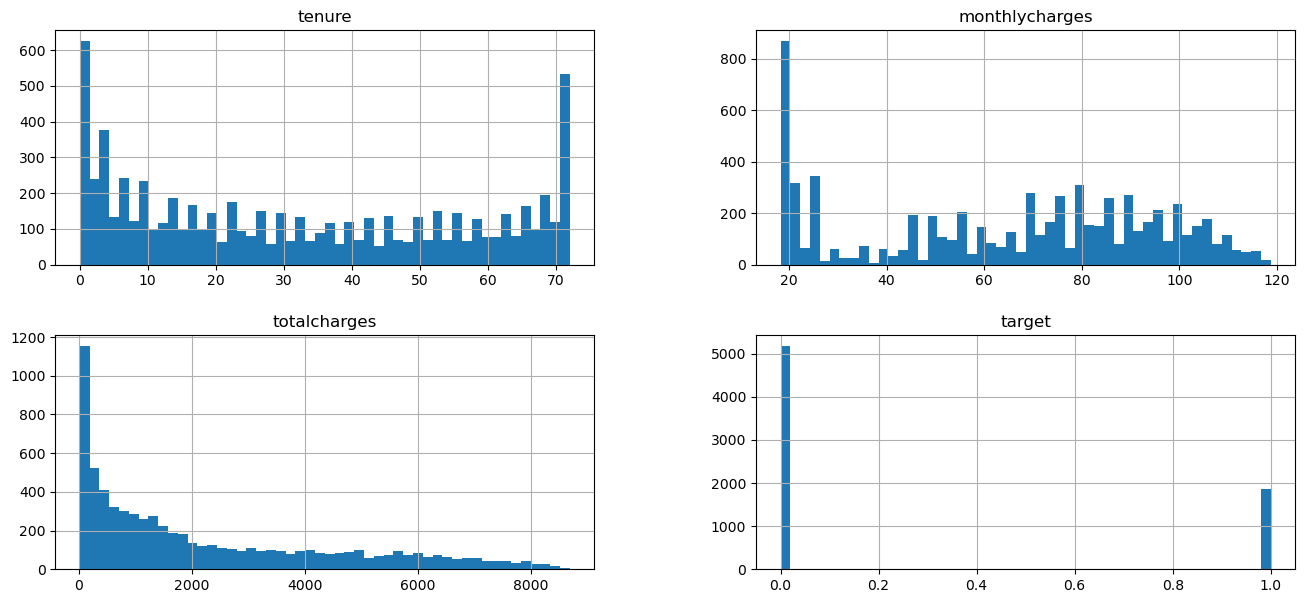

In [70]:
pd.options.plotting.backend = "matplotlib"
df.hist(
    bins=50, 
    figsize=(16,7)   
    )
plt.show()
pd.options.plotting.backend = "plotly"

the histogram shows the distribution of numeric variables , we see the seniorcitizen has quite high values so we will standardized these 
columns in preprocessing step. 

# Feature importance

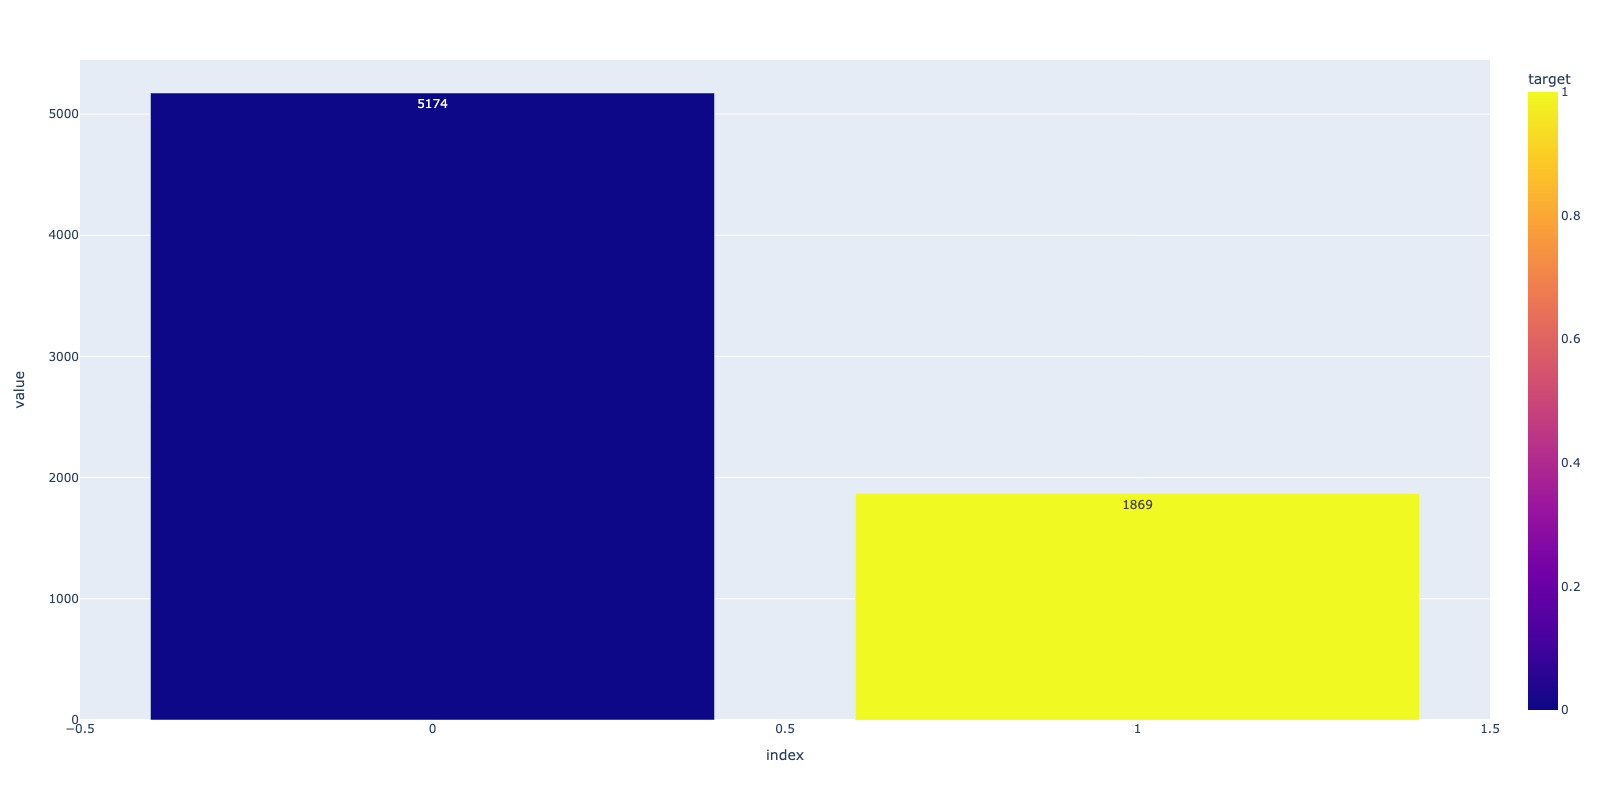

In [71]:
df.groupby(["target"]).agg(total = pd.NamedAgg("target", "count")).reset_index().plot.bar(
    color= "target", text_auto= True, width=1600, height= 800).show("png")

## graph below shows the count of churn and no churns gender, partner and senior citizen

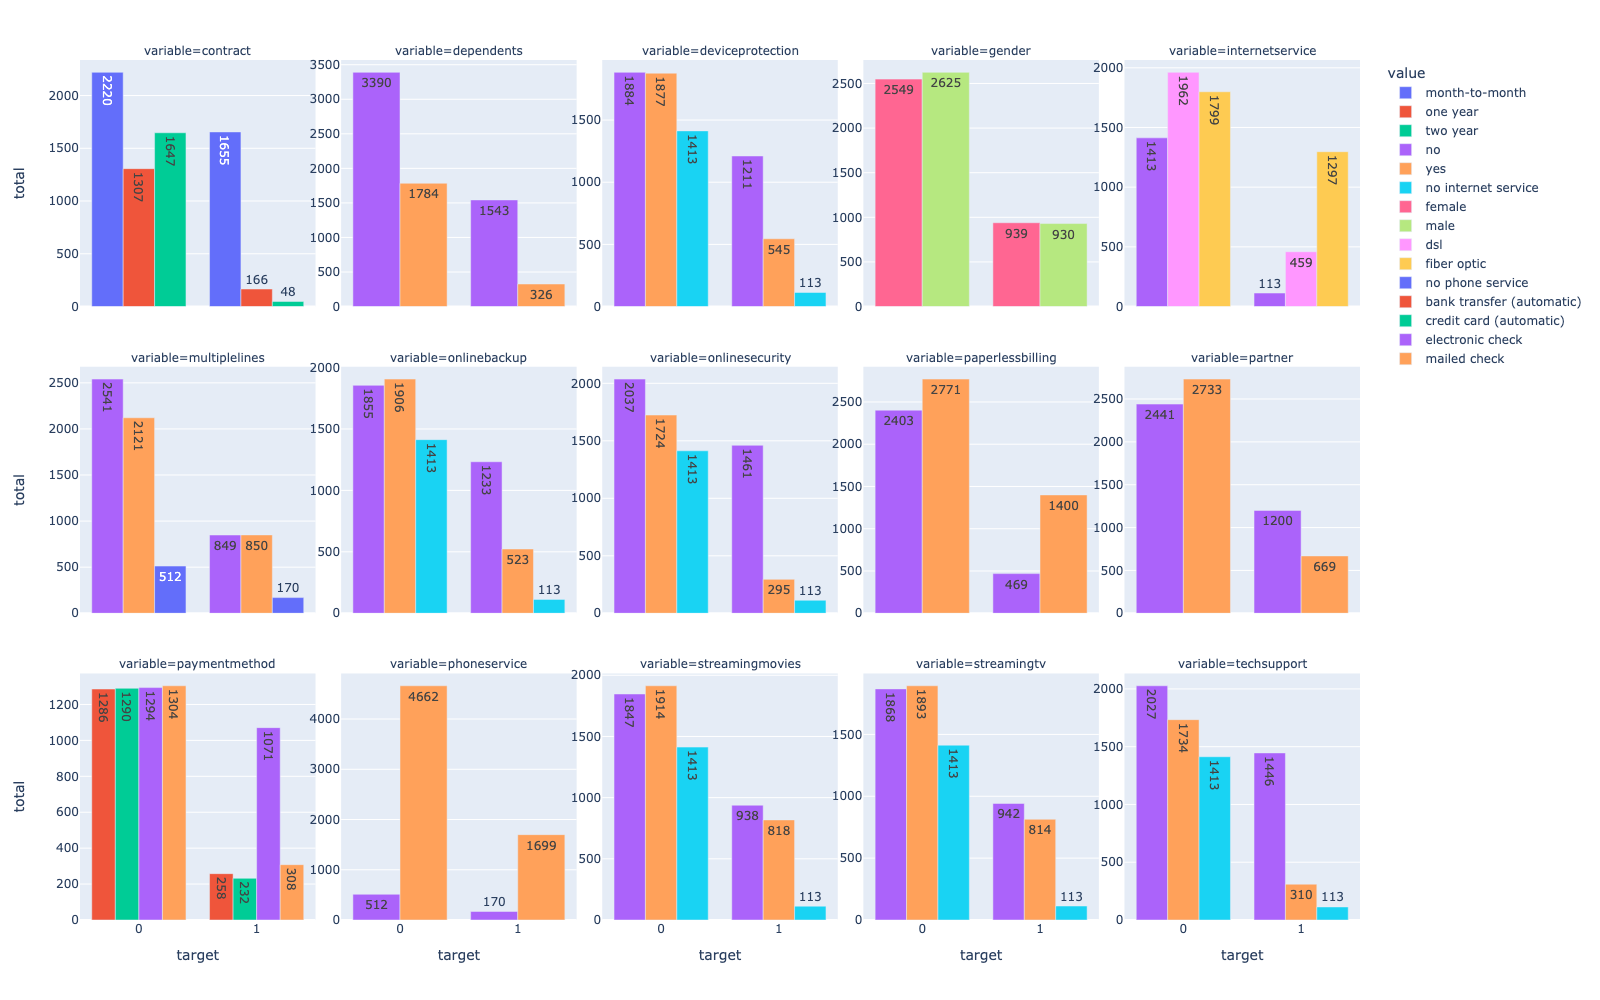

In [72]:
(
    df.melt(id_vars= ["target", "totalcharges"],value_vars= cat_cols)
    .groupby(["target", "variable", "value"])
    .agg(total = pd.NamedAgg( "target","count"))
    .reset_index()
    .plot.bar(x= "target", y= "total", color="value", facet_col="variable",facet_col_wrap= 5 ,  
     barmode= "group",width=1600, height= 1000, text_auto =True)
    .update_yaxes(matches =None,showticklabels=True)
    .update_xaxes(matches = None)    
).show("png")

From the plot above it seems like the gender feature is the least important as the the churn ratios are pretty much the same for male and female

## Risk Ratios

we can calculate the mean value of target variable gouping by the vategorical variables and calculate the risk values as shows in the table below. We can use these risk values as indicators of how likely a customer is to churn. 

* Positive risk ratio mean higher risk and negative means lower risk
* -negative values magnitude tells us that this category is least likely to leave
* positive values magnitude tells us that this category is most likely to leave
* the risk ratio for female and male is closer to 1 and it means that being male or female is not making much of difference

In [73]:
df_ratio= df.target.value_counts()
churrn_ratio= df_ratio[1]/ (df_ratio[1]+ df_ratio[0])


(
    df.melt(id_vars= ["target", "totalcharges"],value_vars= cat_cols)
    .groupby(["variable", "value"])    
    .agg(total = pd.NamedAgg("target", "mean"))
    .reset_index()    
    .assign(churn_diff =  lambda df_: df_.total - churrn_ratio)
    .assign(risk_ratio =  lambda df_: df_.total /churrn_ratio)
    .assign(high_low_risk =  lambda df_: df_.risk_ratio - 1)
    .sort_values(["risk_ratio"], ascending=False)
)


,variable,value,total,churn_diff,risk_ratio,high_low_risk
28,paymentmethod,electronic ...,0.452854,0.187484,1.706502,0.706502
0,contract,month-to-month,0.427097,0.161727,1.609440,0.609440
11,internetser...,fiber optic,0.418928,0.153558,1.578656,0.578656
19,onlinesecurity,no,0.417667,0.152297,1.573906,0.573906
38,techsupport,no,0.416355,0.150985,1.568960,0.568960
16,onlinebackup,no,0.399288,0.133918,1.504645,0.504645
5,deviceprote...,no,0.391276,0.125906,1.474456,0.474456
32,streamingmo...,no,0.336804,0.071434,1.269188,0.269188
23,paperlessbi...,yes,0.335651,0.070281,1.264842,0.264842
35,streamingtv,no,0.335231,0.069861,1.263261,0.263261


# Catagorical Feature Importance
* For categorical variables, one such metric is mutual information, which tells how much information we learn about one variable if we learn the value of the other variable. It’s a concept from information theory, and in machine learning, we often use it to measure the mutual dependency between two variables. Higher values of mutual information mean a higher degree of dependence

In [74]:
from sklearn.metrics import mutual_info_score
def fun_cat_imp(x):
    imp= pd.DataFrame(
    {"feats": [x],
    "score": [mutual_info_score(df[x], df.target).round(2)]}
    )
    return imp
feat_imp_cat= pd.concat(list(map(fun_cat_imp, cat_cols)), axis=0).sort_values("score", ascending=False).reset_index(drop=True)
feat_imp_cat

,feats,score
0,contract,0.10
1,internetser...,0.06
2,onlinesecurity,0.06
3,techsupport,0.06
4,onlinebackup,0.05
5,deviceprote...,0.04
6,paymentmethod,0.04
7,streamingtv,0.03
8,streamingmo...,0.03
9,paperlessbi...,0.02


* we can ignore the variables with score lower then 0.1

In [75]:
feat_imp_cat= feat_imp_cat[feat_imp_cat.score <= 0.01]
cat_cols=feat_imp_cat.feats.values.tolist()
cat_cols

['partner', 'dependents', 'gender', 'phoneservice', 'multiplelines']

In [76]:
df=df.drop(columns= cat_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7043 non-null   bool   
 1   tenure            7043 non-null   int8   
 2   internetservice   7043 non-null   object 
 3   onlinesecurity    7043 non-null   object 
 4   onlinebackup      7043 non-null   object 
 5   deviceprotection  7043 non-null   object 
 6   techsupport       7043 non-null   object 
 7   streamingtv       7043 non-null   object 
 8   streamingmovies   7043 non-null   object 
 9   contract          7043 non-null   object 
 10  paperlessbilling  7043 non-null   object 
 11  paymentmethod     7043 non-null   object 
 12  monthlycharges    7043 non-null   float64
 13  totalcharges      7032 non-null   float64
 14  target            7043 non-null   int8   
dtypes: bool(1), float64(2), int8(2), object(10)
memory usage: 681.0+ KB


# Look for correlation between all variables and target variable

<AxesSubplot: >

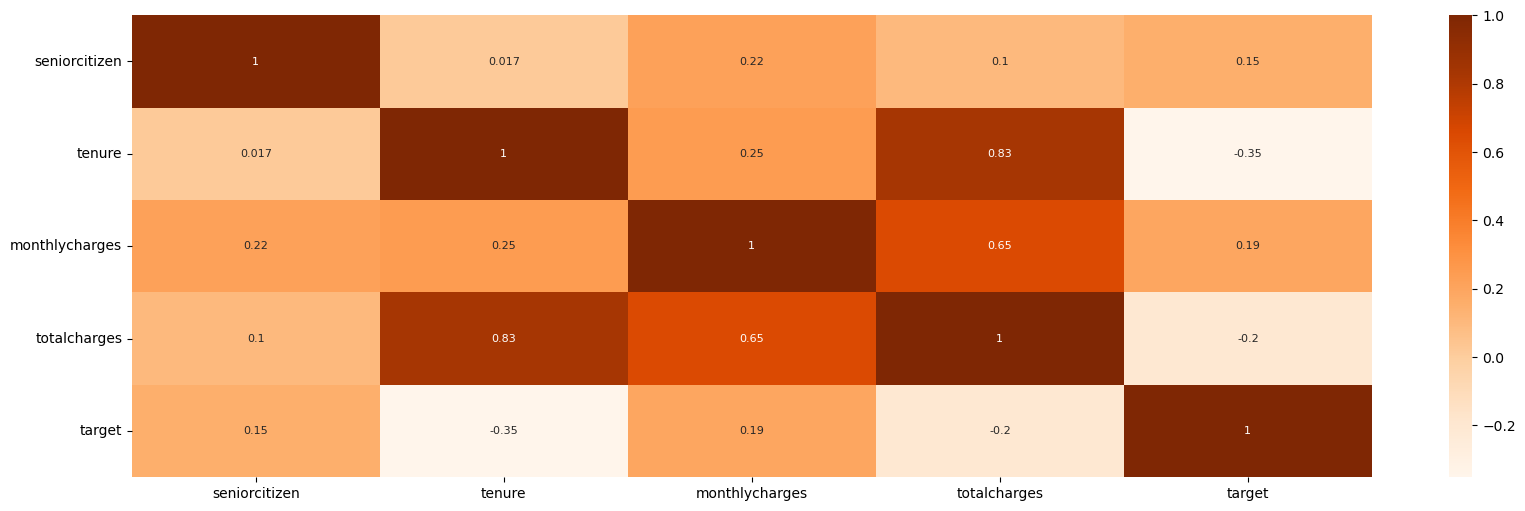

In [77]:
import seaborn as sns
df_cor= df.corr(numeric_only= True).round(3)
plt.figure(figsize=(20, 6))
sns.heatmap(df_cor, cmap= "Oranges" , annot=True, annot_kws={"fontsize":8})

All the numeric features have strong correlation and are important features for analysis

We will convert the data to all factors, as tree based models and linear models dont get effected by factor variables.

In [78]:
df[df.select_dtypes(["bool","object", "category"]).columns] = df.select_dtypes(["bool","object", "category"]).apply(lambda df_: pd.factorize(df_)[0])
df

,seniorcitizen,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
0,0,1,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,0,34,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,0,2,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,0,45,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,2,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0,1,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,0,72,1,0,0,1,0,1,1,1,0,3,103.20,7362.90,0
7040,0,11,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,4,1,0,1,0,0,0,0,0,0,1,74.40,306.60,1


## Impute missing Values

In [79]:
import sys
sys.path.append('../../')
from Templates_ML_.my_imputer import MixImputer
df_final=  MixImputer(impute_missing=True).fit_transform(df)
df_final=df_final .reset_index(drop=True)

In [80]:
df_final.isna().sum()

seniorcitizen       0
tenure              0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
target              0
dtype: int64

Now We are set for preprocessing modelling

# Train/Test Split

We will split the data in train and test for the preprocessing and training the model.
We will use the stritification we that the ratio of classes stays the same between train and test set.

In [81]:
target_variable= "target"
df_x = df_final.drop(columns=target_variable)
df_y = df_final[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size = 0.3, stratify=df_y, random_state =42
    )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4930, 14), (4930,), (2113, 14), (2113,))

# Preprocess Data

In [82]:
# preprocess
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector 
# transformer/imputer/scaller/var filter
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

# Library Models/Metrics pipelines

In [83]:
# Import Models
from sklearn import linear_model ,tree, ensemble
import lightgbm
from catboost import CatBoostClassifier
# metric evaluation and cross validation
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Libraries GRID and sample split

In [84]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

># Preprocessor

In [85]:
# seperate columns
all_cols = X_train.columns.tolist()                      
cat_cols = X_train.select_dtypes(["object","bool","category"]).columns.tolist()                      
num_cols= X_train.columns[~X_train.columns.isin(cat_cols)] 


num_pipe= Pipeline (
        steps =[
        ("std_scaler", StandardScaler()),        
        ("variance_filter", VarianceThreshold(threshold= 0.1)),        
                ]
                    )
cat_pipe= Pipeline (
        steps =[        
        ("one_hot", OneHotEncoder(sparse_output=False, drop= "first", handle_unknown= "ignore")),
        ("variance_filter", VarianceThreshold(threshold= 0.1)),
                ]
                    )

prep = ColumnTransformer(
    transformers= [      
        ("num", num_pipe, num_cols), 
        ("cat", cat_pipe, cat_cols),                      
        ],
        remainder="passthrough",        
n_jobs=-1,
).set_output(transform="pandas")

prep.fit_transform(X_train,y_train)


,num__seniorcitizen,num__tenure,num__internetservice,num__onlinesecurity,num__onlinebackup,num__deviceprotection,num__techsupport,num__streamingtv,num__streamingmovies,num__contract,num__paperlessbilling,num__paymentmethod,num__monthlycharges,num__totalcharges
5557,-0.438147,-1.114728,0.169878,-0.906627,0.178649,-1.007401,-0.915605,0.227907,-1.085390,-0.830916,1.205295,-1.146603,0.504286,-0.836568
2270,2.282338,-1.195884,0.169878,-0.906627,0.178649,0.279921,-0.915605,0.227907,-1.085390,-0.830916,-0.829672,-1.146603,0.724189,-0.907808
6930,-0.438147,-1.195884,0.169878,-0.906627,0.178649,-1.007401,-0.915605,-1.089307,-1.085390,-0.830916,-0.829672,1.463967,0.337292,-0.909640
2257,-0.438147,1.117066,-1.187492,-0.906627,0.178649,0.279921,0.342809,0.227907,0.230315,0.367567,1.205295,1.463967,0.515860,1.110336
898,-0.438147,-0.830682,0.169878,0.349251,0.178649,-1.007401,0.342809,0.227907,0.230315,-0.830916,-0.829672,0.593777,1.122660,-0.515182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,-0.438147,1.238800,0.169878,0.349251,-1.172176,0.279921,0.342809,0.227907,-1.085390,0.367567,1.205295,1.463967,1.307841,1.871050
1488,-0.438147,-1.277041,-1.187492,0.349251,0.178649,-1.007401,-0.915605,-1.089307,-1.085390,-0.830916,1.205295,-0.276413,-0.453036,-0.981840
6303,-0.438147,1.563425,0.169878,-0.906627,-1.172176,0.279921,0.342809,0.227907,0.230315,1.566051,1.205295,-1.146603,1.464915,2.358299
2710,-0.438147,-0.343745,1.527247,1.605129,1.529474,1.567243,1.601223,1.545121,1.546021,0.367567,1.205295,1.463967,-1.473187,-0.793576


# Prepare Models

In [86]:
from sklearn.utils.class_weight import compute_class_weight
sample_weight = compute_class_weight(
             class_weight='balanced', classes=  np.unique(y_train) ,y= y_train
             ) 
MLA= {    
    "lm": linear_model.LogisticRegression(class_weight= "balanced",n_jobs= -1,random_state=1 ),     
    "dt" : tree.DecisionTreeClassifier(class_weight= "balanced",random_state=1),
    "rf": ensemble.RandomForestClassifier(class_weight= "balanced",n_jobs= -1, random_state=1 ),
    "lgb": lightgbm.LGBMClassifier(n_jobs=-1,random_state=1, verbose= -100)    
    }  



# Create complete preprocess + model pipes

In [87]:
pipes = {}
for x in MLA.keys():    
        pipe= Pipeline(steps=[(
                "preprocess", prep),
                ("model", MLA[x])]
                ).set_output(transform="pandas")
        pipes[x]=  pipe
pipes.keys()

dict_keys(['lm', 'dt', 'rf', 'lgb'])

# Create function for valuation scores

In [88]:
from sklearn.metrics import confusion_matrix, classification_report, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
def cl_scores(true, predicted):  
    results= pd.DataFrame.from_dict(classification_report(y_test, predicted, output_dict=True))    
    return results
def eval_scores(actuals, pred):
    res= pd.DataFrame({ 
    "accuracy": [accuracy_score(actuals, pred)], 
    "recall": [recall_score(actuals, pred)],
    "roc_auc": [roc_auc_score(actuals, pred)],
    "precision": [precision_score(actuals, pred)]})
    return res

# Run all models once

In [89]:
from sklearn.metrics import roc_auc_score
cl_report= []
scores= []
auc_scores =[]
for model in MLA.keys():    
    pipes[model].fit(X_train, y_train )     
    cl_report.append(cl_scores(y_test, pipes[model].predict(X_test)).assign(model = model))            
    scores.append( eval_scores(y_test, pipes[model].predict(X_test) ).assign(model = model))   

pd.concat(scores).sort_values("accuracy", ascending=False)

,accuracy,recall,roc_auc,precision,model
0,0.785140,0.504456,0.695527,0.616558,lgb
0,0.779460,0.456328,0.676295,0.613909,rf
0,0.735447,0.802139,0.756740,0.501114,lm
0,0.719356,0.486631,0.645055,0.472318,dt


The model that initially shows the highest accuracy is lgb. But lets run cross validate bcz without hyperparameter tunning most of the tree and ensemble models tend to overfit.

 # Cross Validaiton

In [90]:
pd.options.plotting.backend = "matplotlib"
from sklearn.model_selection import LearningCurveDisplay

cv_scores= []
scores= []

for x in MLA.keys():    
    cv_model_score = cross_validate(
        pipes[x] ,X_train, y_train,cv=10,return_train_score=True, n_jobs=-1, verbose= 0)
    cv_model_score_mean= (
        pd.DataFrame.from_dict(cv_model_score).agg(["mean"]).assign(model=x))
    cv_scores.append(cv_model_score_mean)     


pd.concat(cv_scores).sort_values("test_score", ascending =False)

,fit_time,score_time,test_score,train_score,model
mean,0.054288,0.010985,0.791886,0.891323,lgb
mean,0.344595,0.031462,0.786613,0.996507,rf
mean,0.014270,0.004990,0.743205,0.746090,lm
mean,0.020529,0.005691,0.739148,0.996236,dt


The test score for rf is .78 compared to .99 train score. The randomforest, decision and lgb are overfitting quite a bit as can be seen from the plots below.

## OverFitting 
Overfitting occurs when a machine learning model is too complex and begins to memorize the training data rather than learning to generalize patterns in the data. As a result, the model performs well on the training data, but poorly on new, unseen data.


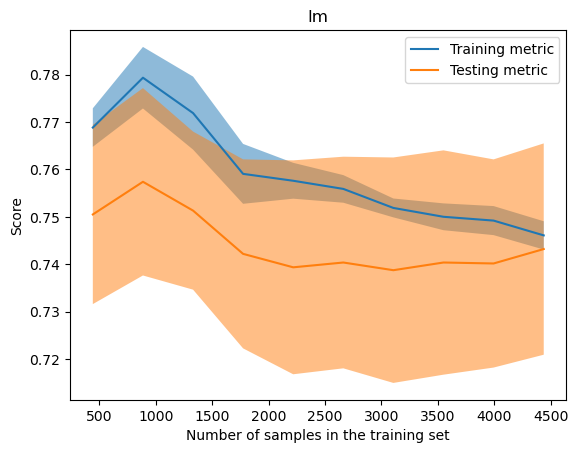

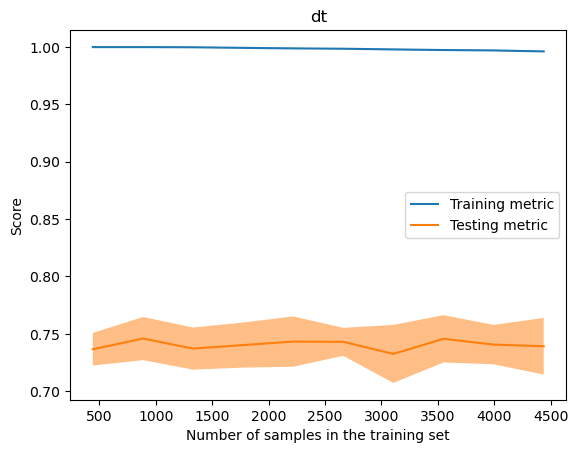

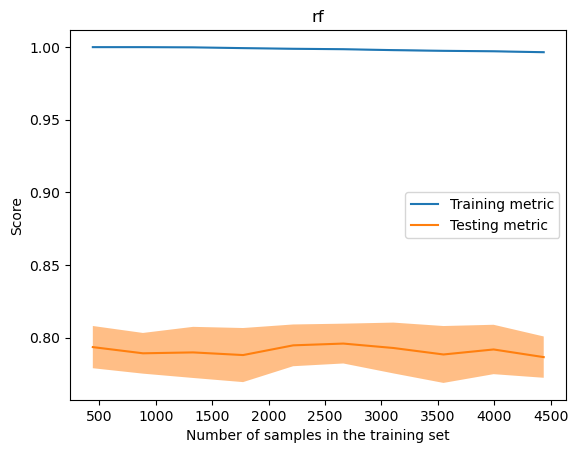

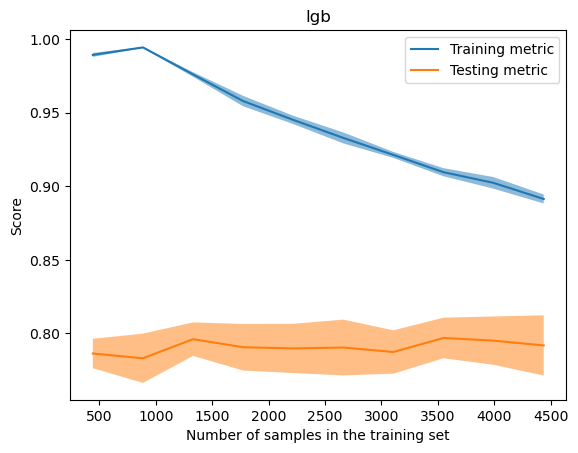

In [91]:
for x in MLA.keys():            
    fig=LearningCurveDisplay.from_estimator(
    pipes[x], X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 ), verbose= 0 
    )   
    plt.title(x)

Lets Tune our model to improve the accuracy and reduce the overfitting so models can genral on unseen data better.

# Hyper Parameters
Lets define out hyperparameters

In [92]:
from scipy.stats import randint, uniform, norm,reciprocal, expon, loguniform
from scipy.stats.distributions import randint, uniform

reciprocal.rvs(20, 200000), expon.rvs(scale=1.0)
# loc is lower bound value and scale is the +2 range and size is number of observations 
uniform.rvs(loc=5, scale=2, size= 10),randint.rvs(low=20, high=70, size=10),norm.rvs(0.1, 1)
# use randint.rvs(1,4) and uniform.rvs to see output values

grid_solvers= ['saga']
grid_poly = randint(1,2)
grid_C=  uniform(0.009, 1)
grid_penalties= ['l2']


grid_n_estimator = randint(500, 900) 
max_features = ['sqrt']
grid_max_depth = randint(2,5) 

grid_learn=  uniform(0.01, .5)

grid_sample_split= randint(20,100)

grid_min_sample_leaves = randint(5, 50)

grid_num_leaves = randint(2,50)

fraction= uniform(0.5, .5)
grid_l2_lambda= uniform(7, 50)

In [93]:
MLA_params = {  
    "lm": [{        
         "model__C": grid_C,
         'model__penalty' : grid_penalties,         
         'model__solver' :grid_solvers,         
         'model__max_iter': [10000]
            }],    
    "dt": [{        
        'model__max_depth': grid_max_depth, 
        'model__max_features': max_features,   
        'model__min_samples_leaf': grid_min_sample_leaves,                    
            }],       
    "rf" : [{                      
        'model__n_estimators': grid_n_estimator,  
        'model__max_depth': grid_max_depth,         
        'model__max_features': max_features,        
        'model__min_samples_leaf': grid_min_sample_leaves,
        'model__min_samples_split': grid_sample_split
            }],        
    "lgb": [{        
        'model__learning_rate': grid_learn,
        'model__num_leaves': grid_num_leaves ,
        'model__min_child_samples': grid_min_sample_leaves,       
        'model__max_depth': grid_max_depth,       
        'model__n_estimators': grid_n_estimator,                          
        'model__scale_pos_weight': [2.4], #[sample_weight[1]/sample_weight[0]]
        "model__reg_lambda": grid_l2_lambda       
        }]    
    } 

# CV split

In [94]:
cv_split = StratifiedKFold(n_splits= 10, random_state=10 , shuffle=True)

# Run Random CV for all models

In [95]:
import warnings
warnings.filterwarnings('ignore')


tune_params = {}
best_model_scores= {}
best_models = {}
cl_report= []
scores =[]

for x in MLA.keys():
#for x in ["lgb"]:
    grid_cv= RandomizedSearchCV(
            pipes[x],
            param_distributions = MLA_params[x],
            cv= cv_split,
            scoring='roc_auc',             
            n_iter = 50,
            refit = "f1",
            random_state=1,
            verbose= 0,
            n_jobs= -1 )

    tune_grid =grid_cv.fit(X_train, y_train)

    tune_params[x]= pd.DataFrame.from_dict(tune_grid.cv_results_ ).assign(model= x)

    best_model_scores[x] = [tune_grid.best_score_]
    best_models[x] = tune_grid.best_estimator_
    best_model = tune_grid.best_estimator_
    best_model.fit(X_train, y_train)        
    cl_report.append(cl_scores(y_test,best_model.predict(X_test)).assign(model=x))
    scores.append(eval_scores(y_test,best_model.predict(X_test)).assign(model=x))
    

## Evaluation Scores
The Model with best ROC/AUC over 10kfold cv has .8495 score on training data

In [96]:
pd.DataFrame.from_dict(best_model_scores)

,lm,dt,rf,lgb
0,0.844361,0.795451,0.842349,0.849146


The best performing model is lgb with best roc_auc score of .8493 on training set, closely followed by rf.

# Cross validation on best models

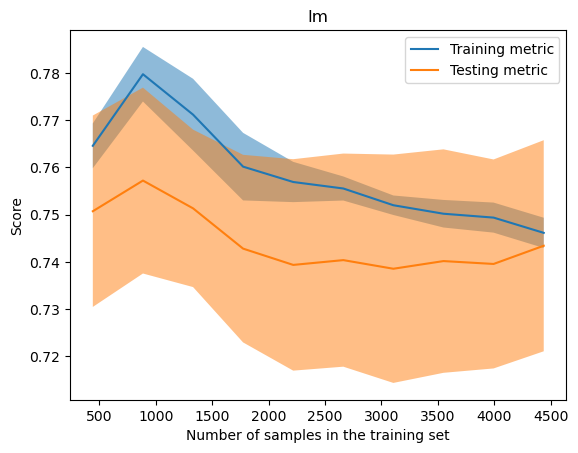

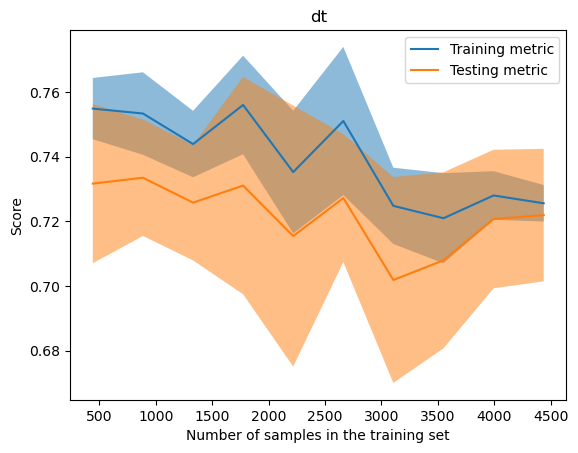

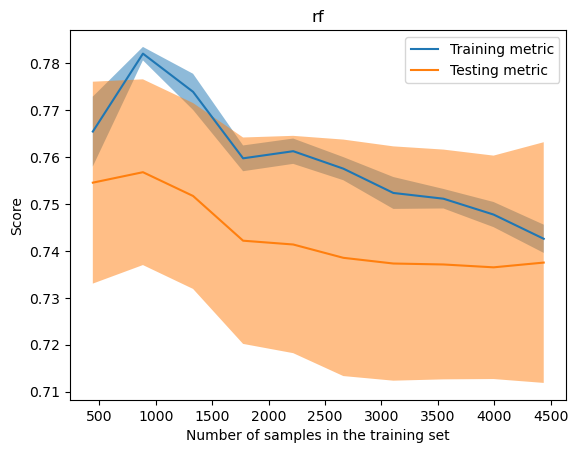

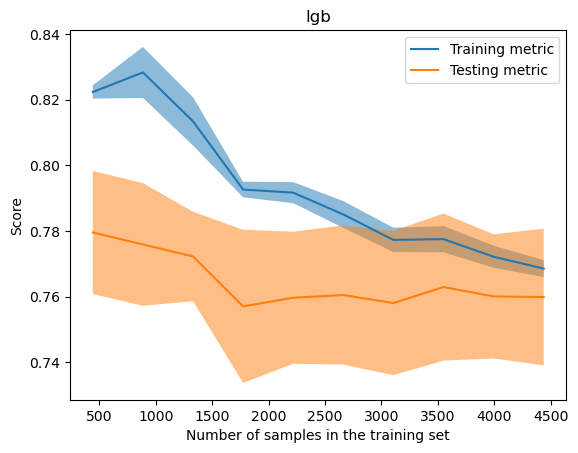

In [97]:
for x in MLA.keys():            
    fig= LearningCurveDisplay.from_estimator(
    best_models[x], X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
    )   
    plt.title(x)

After hyperparamter tuning we see that dt, rf and lgb are performing well. 

# Best Model

In [98]:
test_model_variable= "lgb"

In [99]:
best_model_scores[test_model_variable]
final_pipe= best_models[test_model_variable]
final_pipe = final_pipe.fit(X_train, y_train)
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  [])])),
                ('model',
                 LGBMClassifier(learning_rate=0.21626942075151306, max_depth=3,
                                min_child_samples=23, n_estimators=515,
                                num_leaves=2, random_state=1,
                                reg_lambda=44.40828271899197,
                                scale_pos_weight=2.4, verbose=-100))])

The parameter "scale_pos_weight" of lighgbm is to deal with imbalance of class. I set the this variable to 2.4 which is to tell the model to give minority class 2.4 times more weight. If this weight is reduce to say 2 the result will be that model will classify more non-churns correctly, leading to higher precision and accuracy but lower recall.

In [100]:
eval_scores(y_test, final_pipe.predict(X_test))

,accuracy,recall,roc_auc,precision
0,0.754851,0.796791,0.768241,0.525264


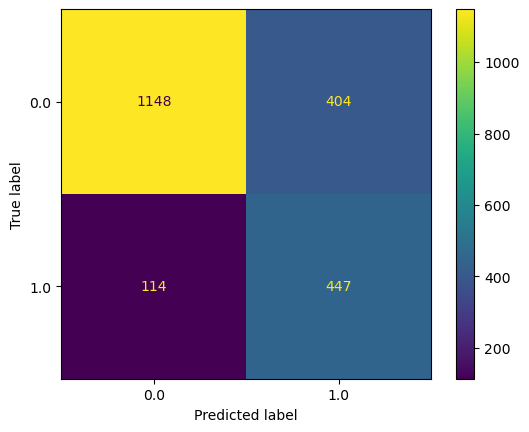

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,final_pipe.predict(X_test), labels=final_pipe["model"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=final_pipe["model"].classes_)
disp.plot()
plt.show()

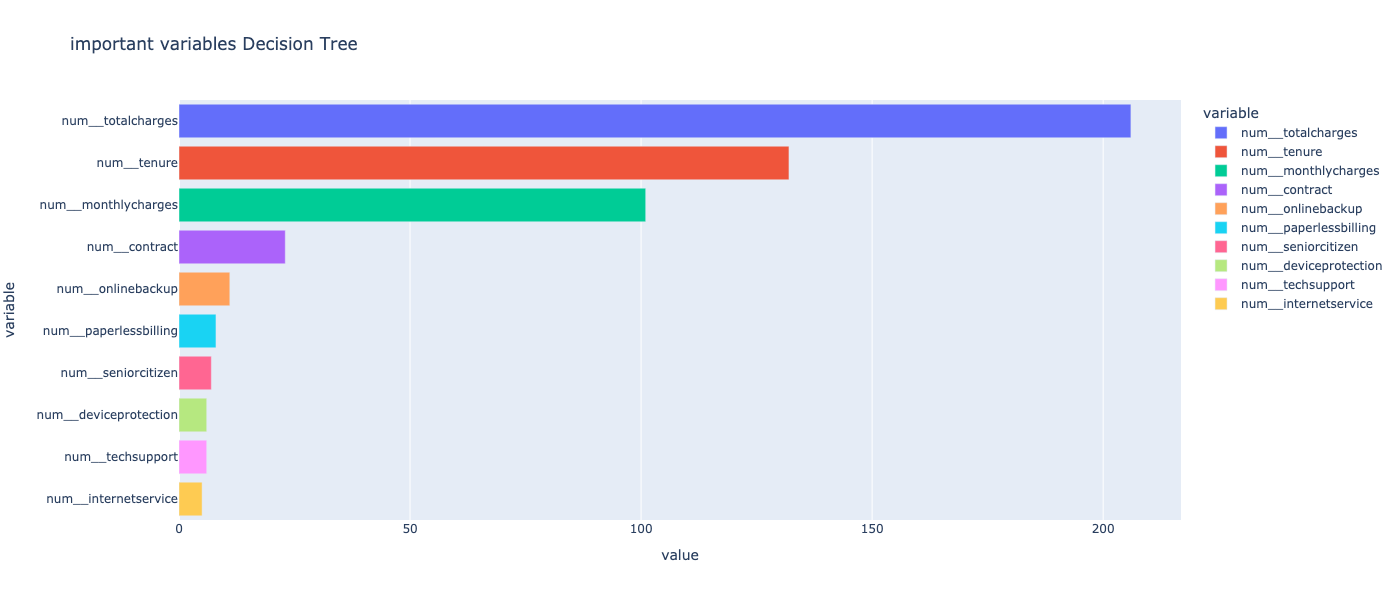

In [102]:
pd.options.plotting.backend = "plotly"
feat_importances = pd.Series( final_pipe["model"].feature_importances_ , 
                             index= final_pipe[:-1].get_feature_names_out() 
                              ).reset_index()
feat_importances.columns = ["variable", "value"]
feat_importances.sort_values("value", ascending=False).head(10).plot.bar(x= "value", y="variable", color= "variable", 
                                                                         width=1400, height=600,
                                                                         title= "important variables Decision Tree").show("png")

* **The plot Above shows th most important variables that lgb uses for predicitions from high to low importance.**

* the top 3 variables are monthlycharges, tenure and totalcharges.

# Lets try another technique to combat class imbalance called over sampling and undersampling. We have differnt popular methods for comabating class imbalance we will review some of the popular ones below.

## Random Oversampling
Random Oversampling is simply randomly picking data points in our minority class and duplicating them. 

## Random Undersampling
Random Undersampling is simply randomly picking data points in our majority class and removing them. 

## Synthetic Minority Oversampling (SMOTE)
Synthetic Minority Oversampling (SMOTE) is an oversampling technique that creates synthetic data points. SMOTE address’ the core problem in oversampling. Oversampling creates duplicate datapoints whereas SMOTE slightly alters these data points. 

## Borderline Smote
The idea behind borderline SMOTE is that we only want to use data that’s at risk of being misclassified as the data to be oversampled. In this case, we build a classifier to classify points as positive or negative. Then, for the data points we misclassify, we oversample those data points. This would hopefully train our algorithm to better recognize these difficult instances and correct for them. 

## Adaptive Synthetic Oversampling (ADASYN)
The idea behind AdaSyn is to use a weight distribution of our minority class. Essentially, we give higher weight to instances that are more difficult to learn and lower weight to instances that are easier to learn. AdaSyn is very similar to safe-level SMOTE, except there’s just a different way of computing the synthetic data points. 

We will only review three oversampling methoda here, namely SMTE, Borderline Smote and ADASYN

In [103]:
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#up_smpl = RandomOverSampler(random_state = 42) 
#up_smpl = RandomUnderSampler(random_state = 42)
from imblearn.over_sampling import SMOTE 
up_smpl = SMOTE(random_state = 42) 


In [104]:
pipes = {}
for x in MLA.keys():    
        pipe= Pipeline(steps=[(
                "preprocess", prep),
                ('sampling', up_smpl),                                
                #('feature_selection', SelectFromModel(linear_model.LogisticRegression(class_weight= "balanced", penalty= "l1", C = .04,solver='liblinear' ))),  
                ("model", MLA[x])]
                ).set_output(transform="pandas")
        pipes[x]=  pipe
pipes.keys()

dict_keys(['lm', 'dt', 'rf', 'lgb'])

# Hyper Parameters

In [105]:
grid_n_estimator = randint(500, 900) 
grid_max_depth = randint(2,5) 
grid_learn=  uniform(0.01, .5)
grid_sample_split= randint(20,100)
grid_min_sample_leaves = randint(5, 50)
grid_num_leaves = randint(2,50)
grid_l2_lambda= uniform(7, 20)

MLA_params = {      
    "lgb": [{        
        #"feature_selection__estimator__C": grid_C,        
        'model__learning_rate': grid_learn,
        'model__num_leaves': grid_num_leaves ,
        'model__min_child_samples': grid_min_sample_leaves,       
        'model__max_depth': grid_max_depth,       
        'model__n_estimators': grid_n_estimator,            
        #'model__scale_pos_weight': [sample_weight[1]/sample_weight[0]],
        "model__reg_lambda": grid_l2_lambda   
        }]   
    } 

## Synthetic Minority Oversampling (SMOTE)

In [106]:
import warnings
warnings.filterwarnings('ignore')
grid_cv= RandomizedSearchCV(
            pipes[test_model_variable],
            param_distributions = MLA_params[test_model_variable],
            cv= cv_split,
            scoring='roc_auc',             
            n_iter = 50,
            refit = "f1",
            random_state=1,
            verbose= 0,
            n_jobs= -1 )

tune_grid =grid_cv.fit(X_train, y_train)


In [107]:
final_pipe= tune_grid.best_estimator_
final_pipe = final_pipe.fit(X_train, y_train)    
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  [])])),
                ('sampling', SMOTE(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.21626942075151306, max_depth=3,
                                min_child_samples=23, n_estimators=515,
                                num_leaves=2, random_state=1,
                                reg_lambda=21.963313087596788, verbose=-100))])

In [108]:
eval_scores(y_test, final_pipe.predict(X_test))

,accuracy,recall,roc_auc,precision
0,0.761477,0.766488,0.763077,0.535492


Using Smote we have improved the overall accuracy of the model. Precision, roc_auc and accuracy has gone up from .52, .765 and .752 to .54, .767 and .765 but recall has gone down slightly from and .795 to and .773.
Over all the results are an improvement on without smote model.

Now lets try Border line smote next.

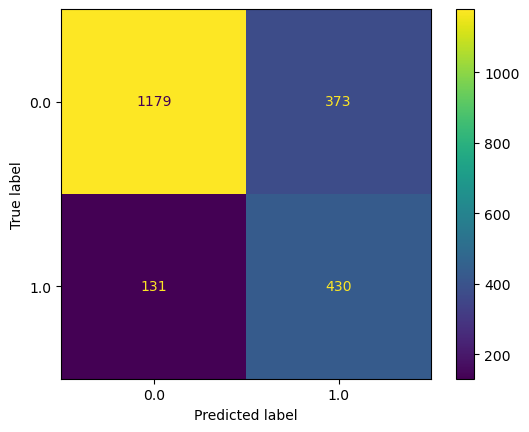

0.0    1552
1.0     561
Name: target, dtype: int64

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,final_pipe.predict(X_test), labels=final_pipe["model"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=final_pipe["model"].classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

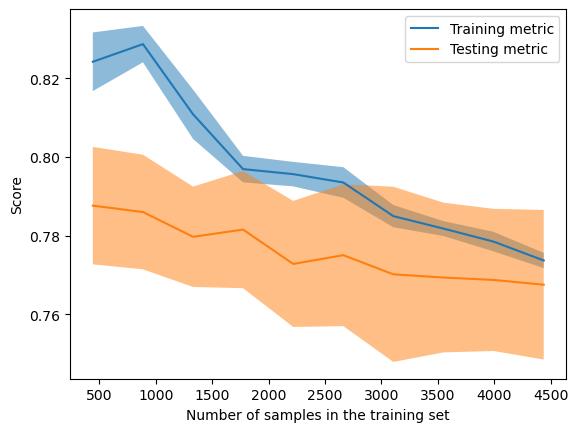

In [110]:
from sklearn.model_selection import LearningCurveDisplay
_ = LearningCurveDisplay.from_estimator(
    final_pipe, X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
)

## Borderline Smote

In [111]:
from imblearn.over_sampling import BorderlineSMOTE
up_smpl = BorderlineSMOTE(random_state = 42) 

pipes = {}
for x in MLA.keys():    
        pipe= Pipeline(steps=[(
                "preprocess", prep),
                ('sampling', up_smpl),                                                
                ("model", MLA[x])]
                ).set_output(transform="pandas")
        pipes[x]=  pipe
pipes.keys()

dict_keys(['lm', 'dt', 'rf', 'lgb'])

In [112]:
import warnings
warnings.filterwarnings('ignore')
grid_cv= RandomizedSearchCV(
            pipes[test_model_variable],
            param_distributions = MLA_params[test_model_variable],
            cv= cv_split,
            scoring='roc_auc',             
            n_iter = 50,
            refit = "f1",
            random_state=1,
            verbose= 0,
            n_jobs= -1 )

tune_grid =grid_cv.fit(X_train, y_train)


In [113]:
final_pipe= tune_grid.best_estimator_
final_pipe = final_pipe.fit(X_train, y_train)    
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  [])])),
                ('sampling', BorderlineSMOTE(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.27672424530258766, max_depth=3,
                                min_child_samples=18, n_estimators=759,
                                num_leaves=2, random_state=1,
                                reg_lambda=7.999069178921744, verbose=-100))])

In [114]:
eval_scores(y_test, final_pipe.predict(X_test))

,accuracy,recall,roc_auc,precision
0,0.753431,0.784314,0.763291,0.52381


Using Borderline Smote roc_auc and recall has improved slightly and  compared to our non-smote model however, precision and overall accuracy has gone down.

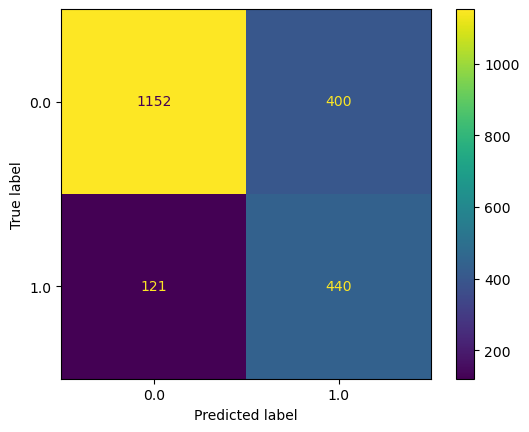

0.0    1552
1.0     561
Name: target, dtype: int64

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,final_pipe.predict(X_test), labels=final_pipe["model"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=final_pipe["model"].classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

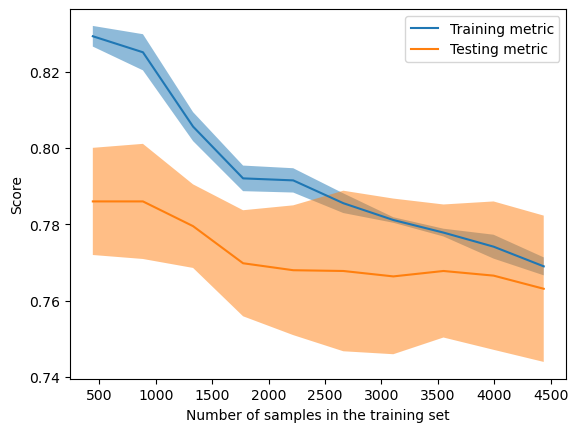

In [116]:
from sklearn.model_selection import LearningCurveDisplay
_ = LearningCurveDisplay.from_estimator(
    final_pipe, X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
)

## Adaptive Synthetic Oversampling (ADASYN)

In [117]:
from imblearn.over_sampling import ADASYN 
up_smpl = ADASYN(random_state = 42) 

pipes = {}
for x in MLA.keys():    
        pipe= Pipeline(steps=[(
                "preprocess", prep),
                ('sampling', up_smpl),                                                
                ("model", MLA[x])]
                ).set_output(transform="pandas")
        pipes[x]=  pipe
pipes.keys()

dict_keys(['lm', 'dt', 'rf', 'lgb'])

In [118]:
import warnings
warnings.filterwarnings('ignore')
grid_cv= RandomizedSearchCV(
            pipes[test_model_variable],
            param_distributions = MLA_params[test_model_variable],
            cv= cv_split,
            scoring='roc_auc',             
            n_iter = 50,
            refit = "f1",
            random_state=1,
            verbose= 0,
            n_jobs= -1 )

tune_grid =grid_cv.fit(X_train, y_train)


In [119]:
final_pipe= tune_grid.best_estimator_
final_pipe = final_pipe.fit(X_train, y_train)    
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  [])])),
                ('sampling', ADASYN(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.27672424530258766, max_depth=3,
                                min_child_samples=18, n_estimators=759,
                                num_leaves=2, random_state=1,
                                reg_lambda=7.999069178921744, verbose=-100))])

In [120]:
eval_scores(y_test, final_pipe.predict(X_test))

,accuracy,recall,roc_auc,precision
0,0.758637,0.764706,0.760575,0.531599


Using ADAYSYN all accuracy and precision has improved from .752, ..52 to .77 and .54 however recall and roc_auc has decreased slightly.
Now lets try Border line smote next.

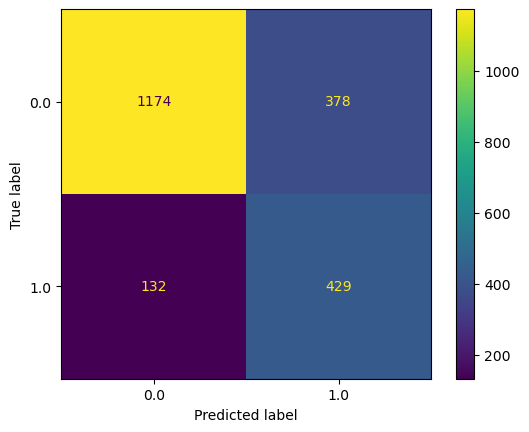

0.0    1552
1.0     561
Name: target, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,final_pipe.predict(X_test), labels=final_pipe["model"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=final_pipe["model"].classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

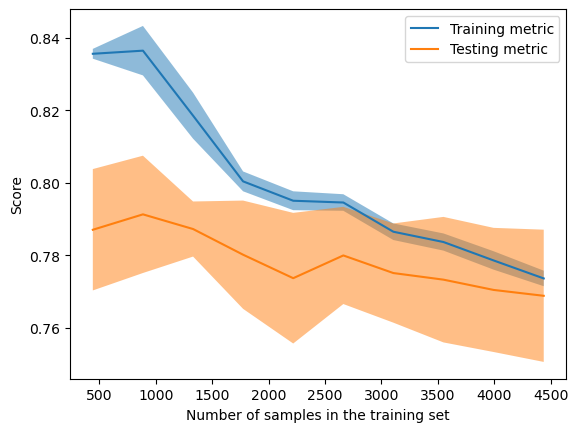

In [122]:
from sklearn.model_selection import LearningCurveDisplay
_ = LearningCurveDisplay.from_estimator(
    final_pipe, X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
)